In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris(as_frame=True)

In [4]:
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = (iris.target == 0)

In [5]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [6]:
X_new = [[2., .5], [3., 1.]]
y_pred = per_clf.predict(X_new)

C:\Users\andrewc3\AppData\Local\Projects\Python\hands-on-ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [7]:
y_pred

array([ True, False])

# Regression MLP

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
X_train_full, X_test_full, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state = 42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    housing.data, housing.target, random_state = 42
)

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)

In [12]:
rmse = root_mean_squared_error(y_valid, y_pred)

In [14]:
rmse

0.5245109352606162

# Tensorflow and Keras

## Classification

In [3]:
import tensorflow as tf

In [4]:
from matplotlib import pyplot as plt

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

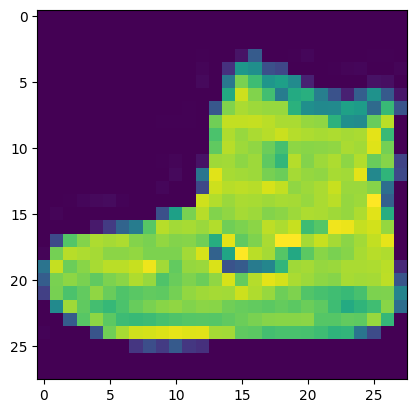

In [20]:
plt.imshow(X_train[0])

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Ankle boot'

In [25]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [28]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer('dense') is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.0667741 , -0.05585092, -0.01697658, ..., -0.0293162 ,
         0.02490574,  0.0440974 ],
       [-0.02004709,  0.07190692, -0.059242  , ..., -0.05070284,
         0.06092447, -0.07433546],
       [ 0.05586562, -0.07057663, -0.00146019, ...,  0.06072798,
         0.07017958,  0.05247276],
       ...,
       [-0.06027601,  0.02554939, -0.00442258, ...,  0.04874031,
        -0.04263511,  0.02548213],
       [-0.05057557,  0.0741014 ,  0.02792089, ...,  0.03248493,
         0.06809692,  0.07034226],
       [-0.0613916 ,  0.03913455,  0.00411531, ...,  0.040036  ,
        -0.07031548, -0.02946924]], dtype=float32)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
weights.shape, biases.shape

((784, 300), (300,))

In [37]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.9812 - val_accuracy: 0.8270 - val_loss: 0.5062
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8244 - loss: 0.5067 - val_accuracy: 0.8352 - val_loss: 0.4612
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8409 - loss: 0.4549 - val_accuracy: 0.8420 - val_loss: 0.4404
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8514 - loss: 0.4245 - val_accuracy: 0.8460 - val_loss: 0.4246
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8581 - loss: 0.4025 - val_accuracy: 0.8470 - val_loss: 0.4129
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8648 - loss: 0.3848 - val_accuracy: 0.8518 - val_loss: 0.4020
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8701 - loss: 0.3701 - val_accuracy: 0.8556 - val_loss: 0.3943
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8740 - loss: 0

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

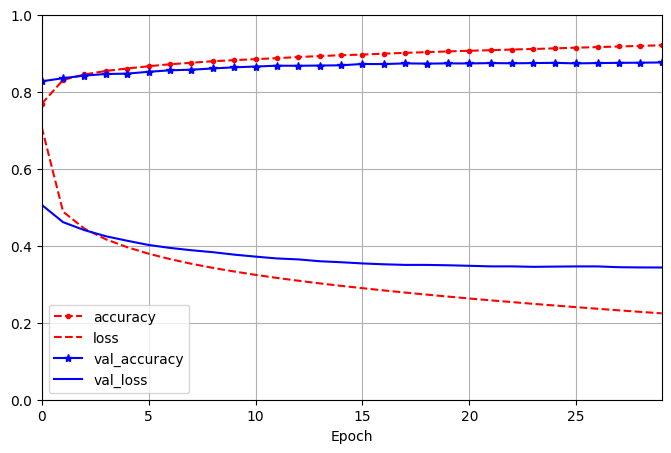

In [48]:
pd.DataFrame(model.history.history).plot(
    figsize=(8, 5), xlim=(0, 29), ylim=[0,1], grid=True, xlabel='Epoch',
    style=['r--.','r--', 'b-*', 'b-']
)
plt.show()

In [51]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9366 - loss: 0.1854 - val_accuracy: 0.8830 - val_loss: 0.3456
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9377 - loss: 0.1823 - val_accuracy: 0.8816 - val_loss: 0.3471
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9391 - loss: 0.1793 - val_accuracy: 0.8828 - val_loss: 0.3493
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9403 - loss: 0.1761 - val_accuracy: 0.8832 - val_loss: 0.3520
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9411 - loss: 0.1735 - val_accuracy: 0.8836 - val_loss: 0.3535
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9419 - loss: 0.1702 - val_accuracy: 0.8830 - val_loss: 0.3528
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9429 - loss: 0.1674 - val_accuracy: 0.8824 - val_loss: 0.3535
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9444 - loss: 0

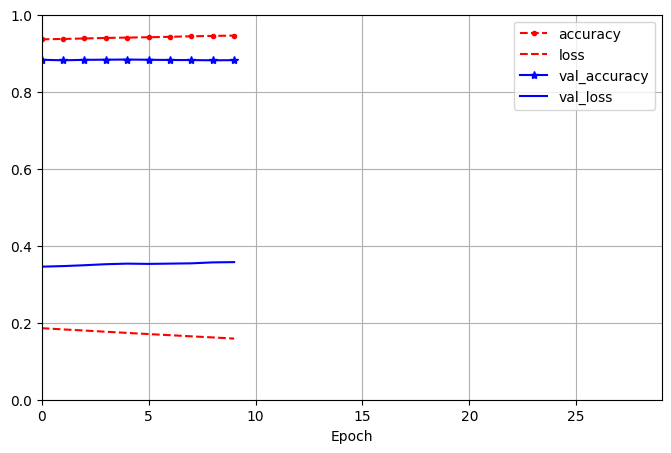

In [53]:
pd.DataFrame(model.history.history).plot(
    figsize=(8, 5), xlim=(0, 29), ylim=[0,1], grid=True, xlabel='Epoch',
    style=['r--.','r--', 'b-*', 'b-']
)
plt.show()

In [54]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8815 - loss: 0.3702


[0.3611893653869629, 0.8842999935150146]

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.022, 0.   , 0.006, 0.   ,
        0.972],
       [0.   , 0.   , 0.998, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [6]:
import numpy as np

In [59]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [61]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Regression

In [9]:
# extra code – load and split the California housing dataset, like earlier
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [10]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

C:\Users\andrewc3\AppData\Local\Projects\Python\hands-on-ml\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)

In [12]:
history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - RootMeanSquaredError: 1.3119 - loss: 1.8639 - val_RootMeanSquaredError: 0.8347 - val_loss: 0.6968
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6418 - loss: 0.4123 - val_RootMeanSquaredError: 0.6009 - val_loss: 0.3611
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.6098 - loss: 0.3720 - val_RootMeanSquaredError: 0.9023 - val_loss: 0.8142
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.5966 - loss: 0.3561 - val_RootMeanSquaredError: 0.9690 - val_loss: 0.9390
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.5841 - loss: 0.3413 - val_RootMeanSquaredError: 0.5829 - val_loss: 0.3398
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.5776 - loss: 0.3338 - val_RootMeanSquaredError: 1.5063 - val_loss: 2.2689
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.5707 - los

In [13]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5262 - loss: 0.2770


(0.2807227671146393, 0.5298327803611755)

In [14]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred, y_test[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


(array([[0.47332382],
        [1.2442799 ],
        [4.9550047 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

## Complex Modeling

In [16]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [17]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

In [19]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [20]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [21]:
history = model.fit(
    (X_train_wide, X_train_deep), y_train, epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), y_valid)
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - RootMeanSquaredError: 1.2535 - loss: 1.6530 - val_RootMeanSquaredError: 3.4582 - val_loss: 11.9591
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6965 - loss: 0.4853 - val_RootMeanSquaredError: 0.6267 - val_loss: 0.3927
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 1.0054 - loss: 1.0288 - val_RootMeanSquaredError: 0.6296 - val_loss: 0.3964
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.6981 - loss: 0.4875 - val_RootMeanSquaredError: 0.6210 - val_loss: 0.3856
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6852 - loss: 0.4696 - val_RootMeanSquaredError: 0.6279 - val_loss: 0.3943
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.7076 - loss: 0.5013 - val_RootMeanSquaredError: 0.6222 - val_loss: 0.3871
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6971 - lo

In [22]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8140 - loss: 0.6628


[0.6595580577850342, 0.8121318221092224]

In [23]:
y_pred = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [24]:
y_pred, y_test[:3]

(array([[1.1540532],
        [1.5634949],
        [2.329699 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))

### Auxilary Output

In [26]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss=('mse', 'mse'), loss_weights=(0.9, 0.1),
    optimizer=optimizer, metrics=['RootMeanSquaredError', 'RootMeanSquaredError']
)

In [32]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

In [33]:
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - dense_12_RootMeanSquaredError: 1.4117 - dense_12_loss: 2.0898 - dense_13_RootMeanSquaredError: 1.7181 - dense_13_loss: 3.0523 - loss: 2.1860 - val_dense_12_RootMeanSquaredError: 1.8565 - val_dense_12_loss: 3.4447 - val_dense_13_RootMeanSquaredError: 1.3190 - val_dense_13_loss: 1.7392 - val_loss: 3.2757
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - dense_12_RootMeanSquaredError: 0.7154 - dense_12_loss: 0.5123 - dense_13_RootMeanSquaredError: 0.8837 - dense_13_loss: 0.7819 - loss: 0.5393 - val_dense_12_RootMeanSquaredError: 1.0940 - val_dense_12_loss: 1.1964 - val_dense_13_RootMeanSquaredError: 0.7748 - val_dense_13_loss: 0.6002 - val_loss: 1.1372
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - dense_12_RootMeanSquaredError: 0.6621 - dense_12_loss: 0.4385 - dense_13_RootMeanSquaredError: 0.7815 - dense_13_loss: 0.6110 - loss: 0.4558 - val_dense_12_RootMeanSquaredError: 0.6706 - val_dense_12_loss: 0.4496 - val_dense_13_Ro

In [34]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_12_RootMeanSquaredError: 0.5750 - dense_12_loss: 0.3307 - dense_13_RootMeanSquaredError: 0.6255 - dense_13_loss: 0.3914 - loss: 0.3368


In [35]:
eval_results

[0.3322333097457886,
 0.325702965259552,
 0.38684916496276855,
 0.5711016654968262,
 0.6220293641090393]

In [36]:
model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


[array([[0.37833786],
        [1.2790228 ],
        [3.5407872 ]], dtype=float32),
 array([[0.38552344],
        [1.0877934 ],
        [3.323276  ]], dtype=float32)]

In [37]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [38]:
model.output_names

ListWrapper(['dense_12', 'dense_13'])

## Subclassing

In [40]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [41]:
model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)

In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss=('mse', 'mse'), loss_weights=(0.9, 0.1),
    optimizer=optimizer, metrics=['RootMeanSquaredError', 'RootMeanSquaredError']
)

In [43]:
model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - RootMeanSquaredError: 1.8273 - RootMeanSquaredError_1: 1.7591 - loss: 3.4612 - mse_loss: 3.1569 - val_RootMeanSquaredError: 0.9707 - val_RootMeanSquaredError_1: 1.3897 - val_loss: 1.0412 - val_mse_loss: 1.9306
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - RootMeanSquaredError: 0.7746 - RootMeanSquaredError_1: 0.9294 - loss: 0.6276 - mse_loss: 0.8650 - val_RootMeanSquaredError: 0.7943 - val_RootMeanSquaredError_1: 0.9473 - val_loss: 0.6575 - val_mse_loss: 0.8972
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.6945 - RootMeanSquaredError_1: 0.8108 - loss: 0.5001 - mse_loss: 0.6577 - val_RootMeanSquaredError: 1.1460 - val_RootMeanSquaredError_1: 0.8620 - val_loss: 1.2562 - val_mse_loss: 0.7428
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6693 - RootMeanSquaredError_1: 0.7723 - loss: 0.4631 - mse_loss: 0.5968 - val_RootMeanSquaredError: 1.0165 - val_RootMeanSquaredEr

In [46]:
model.export('my_keras_model')

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  2300758206288: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2300758204560: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2300758210320: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2300758207824: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2300758197456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2300758199184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2300751592144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2300751592720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2300751591376: TensorSpec(shape=(), dtype=tf.resou

In [47]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")

In [56]:
model((X_new_wide, X_new_deep))

(<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.39404827],
        [1.2337654 ],
        [3.578522  ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.5714948],
        [1.0315982],
        [3.312001 ]], dtype=float32)>)

In [55]:
tfsm_layer((X_new_wide, X_new_deep))

(<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.39404827],
        [1.2337654 ],
        [3.578522  ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.5714948],
        [1.0315982],
        [3.312001 ]], dtype=float32)>)

In [57]:
model.save('my_model.keras')

In [58]:
loaded_model = tf.keras.models.load_model(
    'my_model.keras',
    custom_objects={'WideAndDeepModel': WideAndDeepModel}
)

In [59]:
loaded_model((X_new_wide, X_new_deep))

(<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.39404827],
        [1.2337654 ],
        [3.578522  ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[0.5714948],
        [1.0315982],
        [3.312001 ]], dtype=float32)>)

## Checkpoints

In [61]:
model.save_weights("my_weights.weights.h5")

In [62]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_weights.weights.h5', save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=checkpoint_cb
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - RootMeanSquaredError: 0.5761 - RootMeanSquaredError_1: 0.6211 - loss: 0.3373 - mse_loss: 0.3858 - val_RootMeanSquaredError: 1.1229 - val_RootMeanSquaredError_1: 0.9563 - val_loss: 1.2262 - val_mse_loss: 0.9142
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - RootMeanSquaredError: 0.5779 - RootMeanSquaredError_1: 0.6211 - loss: 0.3392 - mse_loss: 0.3859 - val_RootMeanSquaredError: 0.7785 - val_RootMeanSquaredError_1: 0.7691 - val_loss: 0.6046 - val_mse_loss: 0.5913
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.5726 - RootMeanSquaredError_1: 0.6152 - loss: 0.3330 - mse_loss: 0.3786 - val_RootMeanSquaredError: 0.7009 - val_RootMeanSquaredError_1: 0.6152 - val_loss: 0.4800 - val_mse_loss: 0.3785
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - RootMeanSquaredError: 0.5686 - RootMeanSquaredError_1: 0.6106 - loss: 0.3283 - mse_loss: 0.3730 - val_RootMeanSquaredError: 0.9209 - val_RootMeanSquaredEr

In [63]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.5473 - RootMeanSquaredError_1: 0.5829 - loss: 0.3036 - mse_loss: 0.3399 - val_RootMeanSquaredError: 0.5902 - val_RootMeanSquaredError_1: 0.5829 - val_loss: 0.3475 - val_mse_loss: 0.3398
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - RootMeanSquaredError: 0.5467 - RootMeanSquaredError_1: 0.5814 - loss: 0.3029 - mse_loss: 0.3382 - val_RootMeanSquaredError: 0.5460 - val_RootMeanSquaredError_1: 0.6481 - val_loss: 0.3103 - val_mse_loss: 0.4200
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - RootMeanSquaredError: 0.5455 - RootMeanSquaredError_1: 0.5798 - loss: 0.3015 - mse_loss: 0.3363 - val_RootMeanSquaredError: 0.5569 - val_RootMeanSquaredError_1: 0.5824 - val_loss: 0.3131 - val_mse_loss: 0.3392
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.5436 - RootMeanSquaredError_1: 0.5784 - loss: 0.2995 - mse_loss: 0.3347 - val_RootMeanSquaredError: 0.5777 - val_RootMeanSquaredEr

# Tensorboard

In [64]:
from pathlib import Path
from time import strftime

In [92]:
def get_run_log(root_logdir='my_logs2'):
    return Path(root_logdir) / strftime('run_%Y_%m_%d_%H_%M_%S')

In [93]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    get_run_log(),
    profile_batch=(100, 200)
)

In [94]:
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')
model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss=('mse', 'mse'), loss_weights=(0.9, 0.1),
    optimizer=optimizer, metrics=['RootMeanSquaredError', 'RootMeanSquaredError']
)
model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - RootMeanSquaredError: 1.2882 - RootMeanSquaredError_1: 1.7307 - loss: 1.8490 - mse_loss: 3.0731 - val_RootMeanSquaredError: 1.0747 - val_RootMeanSquaredError_1: 2.0212 - val_loss: 1.4479 - val_mse_loss: 4.0834
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - RootMeanSquaredError: 0.7090 - RootMeanSquaredError_1: 0.9204 - loss: 0.5377 - mse_loss: 0.8486 - val_RootMeanSquaredError: 0.6647 - val_RootMeanSquaredError_1: 1.3020 - val_loss: 0.5672 - val_mse_loss: 1.6944
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - RootMeanSquaredError: 0.6622 - RootMeanSquaredError_1: 0.7811 - loss: 0.4559 - mse_loss: 0.6103 - val_RootMeanSquaredError: 0.6402 - val_RootMeanSquaredError_1: 0.9897 - val_loss: 0.4668 - val_mse_loss: 0.9791
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - RootMeanSquaredError: 0.6437 - RootMeanSquaredError_1: 0.7467 - loss: 0.4289 - mse_loss: 0.5577 - val_RootMeanSquaredError: 0.6253 - val_RootMeanSquaredE

In [95]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    get_run_log(),
    profile_batch=(100, 200)
)

In [96]:
model = WideAndDeepModel(30, activation='relu', name='my_cool_model')
model.norm_layer_deep.adapt(X_train_deep)
model.norm_layer_wide.adapt(X_train_wide)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(
    loss=('mse', 'mse'), loss_weights=(0.9, 0.1),
    optimizer=optimizer, metrics=['RootMeanSquaredError', 'RootMeanSquaredError']
)
model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[tensorboard_cb]
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - RootMeanSquaredError: 1.4834 - RootMeanSquaredError_1: 1.6857 - loss: 2.4043 - mse_loss: 2.9451 - val_RootMeanSquaredError: 0.7261 - val_RootMeanSquaredError_1: 1.5261 - val_loss: 0.7074 - val_mse_loss: 2.3281
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - RootMeanSquaredError: 0.7242 - RootMeanSquaredError_1: 0.8134 - loss: 0.5386 - mse_loss: 0.6619 - val_RootMeanSquaredError: 0.7197 - val_RootMeanSquaredError_1: 0.8602 - val_loss: 0.5401 - val_mse_loss: 0.7398
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - RootMeanSquaredError: 0.6654 - RootMeanSquaredError_1: 0.7589 - loss: 0.4564 - mse_loss: 0.5762 - val_RootMeanSquaredError: 0.6808 - val_RootMeanSquaredError_1: 0.8279 - val_loss: 0.4857 - val_mse_loss: 0.6853
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - RootMeanSquaredError: 0.6362 - RootMeanSquaredError_1: 0.7297 - loss: 0.4178 - mse_loss: 0.5327 - val_RootMeanSquaredError: 0.8413 - val_RootMeanSquaredE

## Hyperparameter Tuning

In [1]:
import keras_tuner as kt

In [2]:
import tensorflow as tf

In [3]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [10]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='my_fashion_mnist', project_name='my_rnd_search', seed=42
)
random_search_tuner.search(
    X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid)
)

Trial 5 Complete [00h 02m 00s]
val_accuracy: 0.8313999772071838

Best val_accuracy So Far: 0.8532000184059143
Total elapsed time: 00h 09m 53s


In [12]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [13]:
top3_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>]

In [14]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [15]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8532000184059143


In [16]:
best_trial.metrics.get_last_value('val_accuracy')

np.float64(0.8532000184059143)

In [17]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8751 - loss: 0.3438
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8781 - loss: 0.3303
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8808 - loss: 0.3189
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8846 - loss: 0.3088
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8887 - loss: 0.3005
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8906 - loss: 0.2927
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8931 - loss: 0.2856
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8956 - loss: 0.2794
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8986 - loss: 0.2723
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9003 - loss: 0.2663
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8607 - loss: 0.4035


In [19]:
class MyClassificationHyperModule(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [21]:
hyperband_tuner= kt.Hyperband(
    MyClassificationHyperModule(), objective='val_accuracy', seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory='my_fashion_mnist', project_name='hyperband'
)

In [23]:
from pathlib import Path

In [24]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(
    X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb, tensorboard_cb]
)

Trial 60 Complete [00h 02m 44s]
val_accuracy: 0.8367999792098999

Best val_accuracy So Far: 0.8700000047683716
Total elapsed time: 00h 58m 27s


In [26]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModule(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 01m 54s]
val_accuracy: 0.8456000089645386

Best val_accuracy So Far: 0.8543999791145325
Total elapsed time: 00h 17m 20s
